# FICO Data Analysing

In [1]:
#importing the required libraries
#for data ploting import scatter_matrix 
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Exploring the Data

In [2]:
#importing training and test data set
loan_data = pd.read_csv('Desktop/loansData.csv')
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [3]:
loan_data['Loan.Length'][0:10]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [4]:
loan_data['Interest.Rate'][0:10]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [5]:
loan_data['FICO.Range'][0:10]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

In [6]:
#importing training and test data set
loan = pd.read_csv('Desktop/loan.csv')
loan.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


## Visualizing the Data

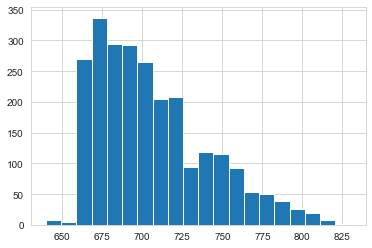

In [7]:
plt.figure()
fico = loan['FICO.Score']
fico.hist(bins=20)

Text(0, 0.5, 'Rate of Interest')

<Figure size 432x288 with 0 Axes>

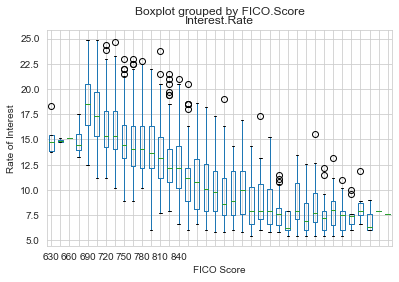

In [8]:
plt.figure()
x = loan.boxplot('Interest.Rate', 'FICO.Score')
x.set_xticklabels(['630',' ','660',' ','690',' ',
                   '720',' ','750',' ','780',' ',
                   '810',' ','840'])
x.set_xlabel('FICO Score')
x.set_ylabel('Rate of Interest')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fd0a5c0>,
      dtype=object)

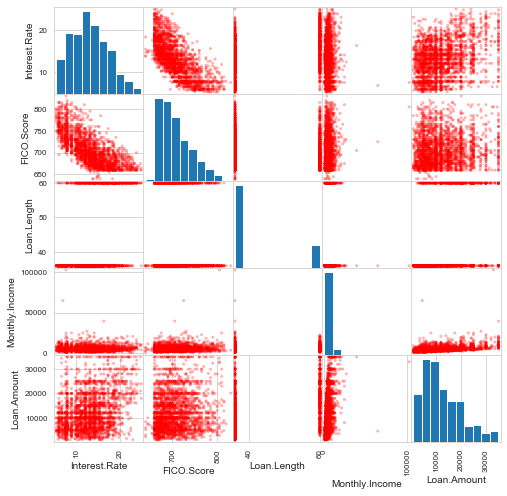

In [9]:
###Scatter_matrix for data visualizing proper
scatter_matrix(loan,alpha=0.3,color='red',figsize=(8,8),grid=False,diagonal='hist')

## Analysing Multivariate Linear Regression
For analysing the data we import statsmodels library for using the an Ordinary Least Square(OLS) module 

In [10]:
import statsmodels.api as sm

In [11]:
dframe = pd.read_csv('Desktop/loan.csv')

In [12]:
int_rate = dframe['Interest.Rate']
loan_amt = dframe['Loan.Amount']
fico_score = dframe['FICO.Score']

In [13]:
# Dependent Variable
y = np.matrix(int_rate).transpose()

In [14]:
# Independent Variable
X1 = np.matrix(fico_score).transpose()
X2 = np.matrix(loan_amt).transpose()

In [15]:
X = np.column_stack([X1,X2])

In [16]:
X3 = sm.add_constant(X)

In [17]:
#OLS = Ordinary Least Square
model = sm.OLS(y,X3)

In [18]:
model_fit = model.fit()

In [19]:
print("The P values are: ",model_fit.pvalues)

print("The R-Squared value is: ",model_fit.rsquared)  # how well the regression line appr the data

The P values are:  [0.00000000e+000 0.00000000e+000 5.96972978e-203]
The R-Squared value is:  0.6566326246493588
